In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('pollutant-standards-index-southtangerang-2020-2022.csv', sep=';')
X = dataset.iloc[:, [1,2]].values
y = dataset.iloc[:, -1].values    # Hanya kolom label/target

In [3]:
# Encode label kategori ke angka
from sklearn.preprocessing import StandardScaler, LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)  # Mengonversi kategori menjadi angka

In [4]:
# Menampilkan label yang diwakili oleh angka setelah encoding
for index, label in enumerate(labelencoder.classes_):
    print(f"{index}: {label}")

0: Good
1: Moderate
2: Unhealthy


In [5]:
#membagi data menjadi training set dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
#melakukan standarisasi karena beberapa algoritma machine learning bekerja lebih baik
#ketika data berada pada skala yang seragam
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski' , p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 68  35   2]
 [ 36 102   2]
 [  8   6   0]]


<ipython-input-10-eae0993dcee3>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


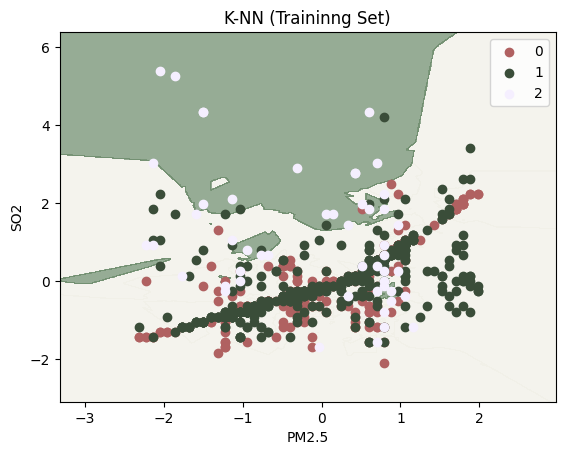

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('#F1F0E8', '#739072')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#B06161','#3A4D39', '#F5EFFF'))(i), label = j)
plt.title('K-NN (Traininng Set)')
plt.xlabel('PM2.5')
plt.ylabel('SO2')
plt.legend()
plt.show()

<ipython-input-11-26b8cc12f86d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


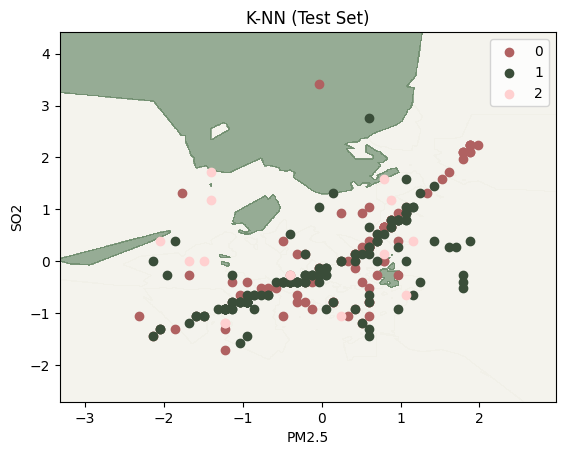

In [11]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('#F1F0E8', '#739072')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('#B06161','#3A4D39', '#FFD0D0'))(i), label = j)
plt.title('K-NN (Test Set)')
plt.xlabel('PM2.5')
plt.ylabel('SO2')
plt.legend()
plt.show()